# Prirodni kubični splajn


Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku 

$$
a\equiv x_0<x_1<x_2<\cdots <x_n\equiv b
$$ 

i izračunajmo vrijednosti 

$$
y_i=f(x_i), \quad i=0,1,\ldots,n.
$$
 
Na intervalu $[x_{i-1},x_i]$ funkciju $f$ aproksimiramo kubičnim polinomom $C_i$,
tako da je na intervalu $[a,b]$ funkcija $f$ aproksimirana funkcijom 

$$
C(x)=C_i(x), \quad x\in[x_{i-1},x_i]
$$

Od funkcije $C(x)$ tražimo 

* _neprekidnost_,
* _neprekidnost prve derivacije_ i
* _neprekidnost druge derivacije_.

Dakle,

\begin{align*}
C_i(x_{i-1})&=y_{i-1}, \quad i=1,\ldots,n, \\
C_i(x_{i})&=y_{i} \quad i=1,\ldots, n,\\
C'_i(x_i)&=C'_{i+1}(x_i), \quad i=1,\ldots,n-1, \\
C'_i(x_i)&=C'_{i+1}(x_i), \quad i=1,\ldots,n-1,
\end{align*}

pa imamo sustav od $4n-2$ jednadžbe i $4n$ nepoznanica (svaki od $n$ polinoma ima 4 koeficijenta).

Vrijede sljedeće tvrdnje:

$$
C_i(x)=y_{i-1}-s_{i-1}\frac{h_i^2}{6}+b_i(x-x_{i-1})+\frac{s_{i-1}}{6h_i}(x_i-x)^3
+\frac{s_i}{6h_i}(x-x_{i-1})^3,
$$

gdje je 

\begin{align*}
b_i&=d_i-(s_i-s_{i-1})\frac{h_i}{6},\\
d_i&=\frac{y_i-y_{i-1}}{h_i},\\
h_i&=x_i-x_{i-1},
\end{align*}

a brojevi $s_i$, $i=0,1,\ldots,n$, zadovoljavaju sustav jednadžbi 

$$
s_{i-1}h_i+2s_i(h_i+h_{i+1})+s_{i+1}h_{i+1}=6(d_{i+1}-d_i),\quad i=1,\ldots,n-1.
$$

Ako zadamo $s_0$ i $s_n$, sustav će imati jedinstveno rješenje. 

Najčešće sz zadani _prirodni uvjeti_:
$$
s_0=0, \quad s_n=0.
$$ 

U tom slučaju, $s_1,\ldots,s_{n-1}$ su rješenja sustava

$$
\begin{bmatrix} 2(h_1+h_2) & h_2 & 0 & \cdots & 0 & 0 \\
h_2 & 2(h_2+h_3) & h_3 & \cdots & 0 & 0 \\
0 & h_3 & 2(h_3+h_4) & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 2(h_{n-2}+h_{n-1}) & h_{n-1} \\
0 & 0 & 0 & \cdots & h_{n-1}  & 2(h_{n-1}+h_{n})\\
\end{bmatrix}
\begin{bmatrix}
s_1\\ s_2 \\ s_3 \\ \vdots \\ s_{n-2} \\ s_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
6(d_2-d_1)\\
6(d_3-d_2)\\
6(d_4-d_3) \\
\vdots \\
6(d_{n-1}-d_{n-2}\\
6(d_n-d_{n-1})
\end{bmatrix}.
$$

Dokaz se nalazi u udžbeniku [Numerička matematika, str. 29][RS04].

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

Matrica sustava je _tridijagonalna_ i _pozitivno definitna_ pa se sustav može riješiti metodom Choleskog (bez pivotiranja) u $O(n)$ operacija. 



Vrijede _ocjene pogreške_:

\begin{align*}
\max |f(x)-C(x)| &\leq \frac{5}{384} \max h_i^4 \\
\max |f'(x)-C'(x)| &\leq \frac{1}{24} \max h_i^3 \\
\max |f''(x)-C''(x)| &\leq \frac{3}{8} \max h_i^2. 
\end{align*}

Ocjene se mogu promatrati i na svakom intervalu posebno.

## Primjer - Interpolacija slučajnih točaka

In [1]:
using Polynomials
using Plots
include("Vandermonde.jl")

Matrix (generic function with 1 method)

In [2]:
# Broj intervala
using Random, LinearAlgebra
Random.seed!(123)
n=5
x=sort(rand(n+1))
y=rand(n+1)
h=x[2:end]-x[1:end-1]
d=(y[2:end]-y[1:end-1])./h
H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])

4×4 SymTridiagonal{Float64,Array{Float64,1}}:
 0.698622  0.267102    ⋅          ⋅      
 0.267102  0.557011   0.0114039   ⋅      
  ⋅        0.0114039  0.211786   0.094489
  ⋅         ⋅         0.094489   0.533113

In [3]:
b1=6*(d[2:end]-d[1:end-1])
s=H\b1
s=[0;s;0]

6-element Array{Float64,1}:
    0.0             
  155.9339732397957 
 -243.76386679866204
  456.4451554182228 
  -67.19294096640769
    0.0             

In [4]:
# Definirajmo polinome
b=d-(s[2:end]-s[1:end-1]).*h/6
C=Array{Any}(undef,n)
C=[xx -> 
    y[i]-s[i]*h[i]^2/6+b[i]*(xx-x[i])+s[i]*(x[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-x[i])^3/(6*h[i]) 
    for i=1:n]

5-element Array{getfield(Main, Symbol("##4#6")){Int64},1}:
 getfield(Main, Symbol("##4#6")){Int64}(1)
 getfield(Main, Symbol("##4#6")){Int64}(2)
 getfield(Main, Symbol("##4#6")){Int64}(3)
 getfield(Main, Symbol("##4#6")){Int64}(4)
 getfield(Main, Symbol("##4#6")){Int64}(5)

In [5]:
# Definirajmo točke za crtanje
lsize=200
xx=range(x[1],x[end],length=lsize)
ySpline=Array{Float64}(undef,lsize)
for i=1:lsize
    for k=1:n
        if xx[i]<=x[k+1]
            ySpline[i]=C[k](xx[i])
            break
        end
    end
end

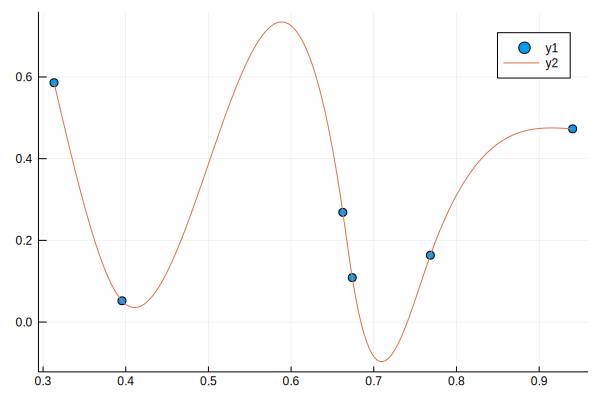

In [6]:
# Crtanje
scatter(x,y)
plot!(xx,ySpline)

Usporedimo splajn s interpolacijskim polinomom:

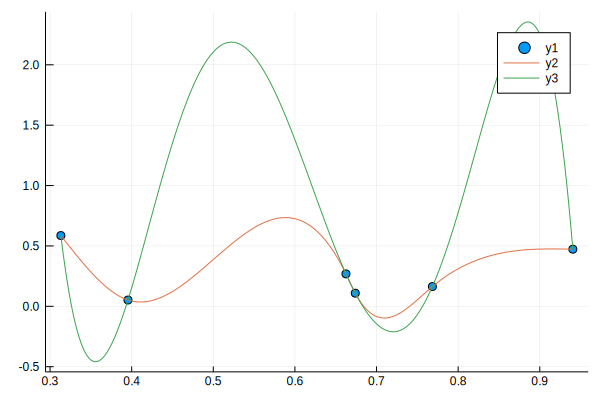

In [7]:
A=Vandermonde(x)
p=Poly(A\y)
yPoly=polyval(p,xx)
scatter(x,y)
plot!(xx,[ySpline yPoly])

Usporedimo splajn s interpolacijskim polinomom kada mijenjamo jednu točku:

In [8]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6621655647250808943\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18267970948629578914\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6621655647250808943\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [10]:
# Traje duze!
point=3
xc=deepcopy(x)

ySpline=Array{Float64}(undef,lsize)
yPoly=Array{Float64}(undef,lsize)
C=Array{Any}(undef,n)

@manipulate for xp=xc[point-1]:0.01:xc[point+1]
    xc[point]=xp
    h=xc[2:end]-xc[1:end-1]
    d=(y[2:end]-y[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b1=6*(d[2:end]-d[1:end-1])
    s=H\b1
    s=[0;s;0]
    b=d-(s[2:end]-s[1:end-1]).*h/6
    C=[xx-> 
    y[i]-s[i]*h[i]^2/6+b[i]*(xx-xc[i])+s[i]*(xc[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-xc[i])^3/(6*h[i])
        for i=1:n]
    for i=1:lsize
        for k=1:n
            if xx[i]<=xc[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    A=Vandermonde(xc)
    p=Poly(A\y)
    yPoly=polyval(p,xx)
    scatter(xc,y)
    plot!(xx,[ySpline yPoly])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["xp"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>28,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/slap/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/slap/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/slap/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/slap/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/slap/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ff540164280])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.395453\",\"0.405453\",\"0.415453\",\"0.425453\",\"0.435453\",\"0.445453\",\"0.455453\",\"0.465453\",\"0.475453\",\"0.485453\",\"0.495453\",\"0.505453\",\"0.515453\",\"0.525453\",\"0.535453\",\"0.545453\",\"0.555453\",\"0.565453\",\"0.575453\",\"0.585453\",\"0.595453\",\"0.605453\",\"0.615453\",\"0.625453\",\"0.635453\",\"0.645453\",\"0.655453\",\"0.665453\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10968646931912011571\",\"id\":\"ob_12\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":

## Primjer - Interpolacija funkcije $\sin(x)$

In [12]:
n=5
a=0
b=pi
f(x)=sin.(x)

x=range(a,b,length=n+1)
y=f(x)
lsize=200
xx=range(a,b,length=lsize)
ySpline=Array{Float64}(undef,lsize)
yPoly=Array{Float64}(undef,lsize)
yFun=f(xx)

point=3
xc=collect(deepcopy(x))
yc=deepcopy(y)
@manipulate for xp=xc[point-1]:0.01:xc[point+1]
    # Splajn
    xc[point]=xp
    yc[point]=f(xp)
    
    h=xc[2:end]-xc[1:end-1]
    d=(yc[2:end]-yc[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b1=6*(d[2:end]-d[1:end-1])
    s=H\b1
    s=[0;s;0]
    b=d-(s[2:end]-s[1:end-1]).*h/6
    C=Array{Any}(undef,n)
    C=[xx-> 
    yc[i]-s[i]*h[i]^2/6+b[i]*(xx-xc[i])+s[i]*(xc[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-xc[i])^3/(6*h[i])
        for i=1:n]
    for i=1:lsize
        for k=1:n
            if xx[i]<=xc[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    
    # Polinom
    A=Vandermonde(xc)
    p=Poly(A\yc)
    yPoly=polyval(p,xx)
    
    scatter(xc,yc)
    plot!(xx,[ySpline yPoly])
    # Pogreske
    #=
    norm(ySpline[2:end-1]-yFun[2:end-1],Inf), 
    norm((ySpline[2:end-1]-yFun[2:end-1])./yFun[2:end-1],Inf),
    norm(yPoly[2:end-1]-yFun[2:end-1],Inf),
    norm((yPoly[2:end-1]-yFun[2:end-1])./yFun[2:end-1],Inf)
    =#
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["xp"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>126,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
63, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/slap/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/slap/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/slap/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/slap/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/slap/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ff542fbf340])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.628319\",\"0.638319\",\"0.648319\",\"0.658319\",\"0.668319\",\"0.678319\",\"0.688319\",\"0.698319\",\"0.708319\",\"0.718319\",\"0.728319\",\"0.738319\",\"0.748319\",\"0.758319\",\"0.768319\",\"0.778319\",\"0.788319\",\"0.798319\",\"0.808319\",\"0.818319\",\"0.828319\",\"0.838319\",\"0.848319\",\"0.858319\",\"0.868319\",\"0.878319\",\"0.888319\",\"0.898319\",\"0.908319\",\"0.918319\",\"0.928319\",\"0.938319\",\"0.948319\",\"0.958319\",\"0.968319\",\"0.978319\",\"0.988319\",\"0.998319\",\"1.00832\",\"1.01832\",\"1.02832\",\"1.03832\",

## Primjer - Interpolacija funkcije $f(x)=1-|x-1|$, $x\in[0,2]$

In [14]:
n=10
a=0
b=2
f(x)=1 .-abs.(x .-1)

# Ravnomjerno raspoređene točke
x=collect(range(a,b,length=n+1))
y=f(x)
lsize=200
xx=range(a,b,length=lsize)
ySpline=Array{Float64}(undef,lsize)
yPoly=Array{Float64}(undef,lsize)
yFun=f(xx)

point=3
xc=deepcopy(x)
yc=deepcopy(y)
@manipulate for xp=xc[point-1]:0.01:xc[point+1]
    # Splajn
    xc[point]=xp
    yc[point]=sin(xp)
    h=xc[2:end]-xc[1:end-1]
    d=(yc[2:end]-yc[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b1=6*(d[2:end]-d[1:end-1])
    s=H\b1
    s=[0;s;0]
    b=d-(s[2:end]-s[1:end-1]).*h/6
    C=Array{Any}(undef,n)
    C=[xx-> 
    yc[i]-s[i]*h[i]^2/6+b[i]*(xx-xc[i])+s[i]*(xc[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-xc[i])^3/(6*h[i])
        for i=1:n]
    for i=1:lsize
        for k=1:n
            if xx[i]<=xc[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    
    # Polinom
    A=Vandermonde(xc)
    p=Poly(A\yc)
    yPoly=polyval(p,xx)
    
    scatter(xc,yc)
    plot!(xx,[ySpline yPoly])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["xp"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
21, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/slap/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/slap/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/slap/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/slap/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/slap/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ff5a9780eb0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\",\"0.32\",\"0.33\",\"0.34\",\"0.35\",\"0.36\",\"0.37\",\"0.38\",\"0.39\",\"0.4\",\"0.41\",\"0.42\",\"0.43\",\"0.44\",\"0.45\",\"0.46\",\"0.47\",\"0.48\",\"0.49\",\"0.5\",\"0.51\",\"0.52\",\"0.53\",\"0.54\",\"0.55\",\"0.56\",\"0.57\",\"0.58\",\"0.59\",\"0.6\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12278274611539708718\",\"id\":\"ob_48\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":